In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ri = pd.read_csv('police/police.csv')
ri

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [3]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [4]:
ri.shape

(91741, 15)

In [5]:
ri.drop(['county_name', 'state'], axis=1, inplace=True)
ri.shape

(91741, 13)

In [6]:
ri.dropna(subset=['driver_gender'], inplace=True)
ri.shape

(86536, 13)

In [11]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [8]:
ri.is_arrested

0        False
1        False
2        False
3         True
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Name: is_arrested, Length: 86536, dtype: object

In [9]:
ri['is_arrested'] = ri.is_arrested.astype('bool')
ri.is_arrested.dtype

dtype('bool')

In [10]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [12]:
ri.set_index('stop_datetime', inplace=True)
ri.index, ri.columns

(DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
                '2005-02-17 04:15:00', '2005-02-20 17:15:00',
                '2005-02-24 01:20:00', '2005-03-14 10:00:00',
                '2005-03-29 21:55:00', '2005-04-04 21:25:00',
                '2005-07-14 11:20:00', '2005-07-14 19:55:00',
                ...
                '2015-12-31 13:23:00', '2015-12-31 18:59:00',
                '2015-12-31 19:13:00', '2015-12-31 20:20:00',
                '2015-12-31 20:50:00', '2015-12-31 21:21:00',
                '2015-12-31 21:59:00', '2015-12-31 22:04:00',
                '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
               dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None),
 Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
        'violation_raw', 'violation', 'search_conducted', 'search_type',
        'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
        'district'],
       dtype='object'))

In [13]:
ri.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [14]:
ri.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

In [15]:
female = ri[ri.driver_gender == 'F']
male = ri[ri.driver_gender == 'M']
female.violation.value_counts(normalize=True), male.violation.value_counts(normalize=True)

(Speeding               0.658114
 Moving violation       0.138218
 Equipment              0.105199
 Registration/plates    0.044418
 Other                  0.029738
 Seat belt              0.024312
 Name: violation, dtype: float64, Speeding               0.522243
 Moving violation       0.206144
 Equipment              0.134158
 Other                  0.058985
 Registration/plates    0.042175
 Seat belt              0.036296
 Name: violation, dtype: float64)

In [18]:
female_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]
male_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]
female_speeding.stop_outcome.value_counts(normalize=True), \
male_speeding.stop_outcome.value_counts(normalize=True)

(Citation            0.952192
 Warning             0.040074
 Arrest Driver       0.005752
 N/D                 0.000959
 Arrest Passenger    0.000639
 No Action           0.000383
 Name: stop_outcome, dtype: float64, Citation            0.944595
 Warning             0.036184
 Arrest Driver       0.015895
 Arrest Passenger    0.001281
 No Action           0.001068
 N/D                 0.000976
 Name: stop_outcome, dtype: float64)

In [19]:
ri.search_conducted.dtype

dtype('bool')

In [20]:
ri.search_conducted.value_counts(normalize=True)

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

In [21]:
ri.search_conducted.mean()

0.0382153092354627

In [22]:
ri[ri.driver_gender == 'F'].search_conducted.mean()

0.019180617481282074

In [23]:
ri[ri.driver_gender == 'M'].search_conducted.mean()

0.04542557598546892

In [24]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [25]:
ri.groupby(['driver_gender', 'violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64

In [26]:
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [27]:
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [30]:
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)
ri.frisk.dtype, ri.frisk.sum()

(dtype('bool'), 303)

In [32]:
searched = ri[ri.search_conducted == True]
searched.frisk.mean(), searched.groupby('driver_gender').frisk.mean()

(0.09162382824312065, driver_gender
 F    0.074561
 M    0.094353
 Name: frisk, dtype: float64)

In [33]:
ri.is_arrested.mean()

0.0355690117407784

In [35]:
hourly_arrest = ri.groupby(ri.index.hour).is_arrested.mean()
hourly_arrest

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64

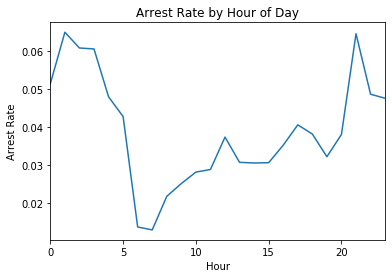

In [36]:
hourly_arrest.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Hour of Day');

In [38]:
annual_drug = ri.drugs_related_stop.resample('A').mean()
annual_drug

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

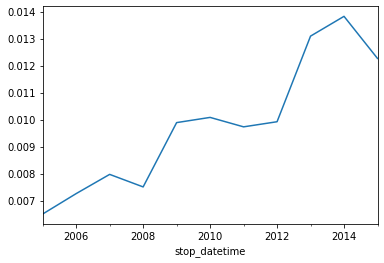

In [39]:
annual_drug.plot();

In [40]:
annual_search = ri.search_conducted.resample('A').mean()
annual_search

stop_datetime
2005-12-31    0.049167
2006-12-31    0.041758
2007-12-31    0.044056
2008-12-31    0.040310
2009-12-31    0.049861
2010-12-31    0.044805
2011-12-31    0.035682
2012-12-31    0.033616
2013-12-31    0.030022
2014-12-31    0.031801
2015-12-31    0.028497
Freq: A-DEC, Name: search_conducted, dtype: float64

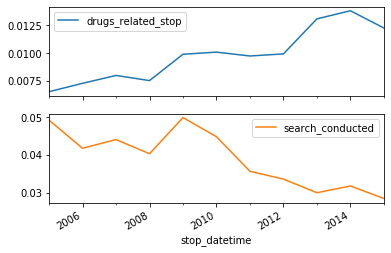

In [41]:
annual = pd.concat([annual_drug, annual_search], axis=1)
annual.plot(subplots=True);

In [43]:
all_zones = pd.crosstab(ri.district, ri.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [45]:
k_zones = all_zones.loc['Zone K1':'Zone K3']
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


In [46]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [47]:
ri['stop_minutes'] = ri.stop_duration.map({'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45})

In [48]:
ri.stop_minutes.unique()

array([ 8, 23, 45])

In [49]:
weather = pd.read_csv('police/weather.csv')
weather

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
weather[['TMIN', 'TAVG', 'TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


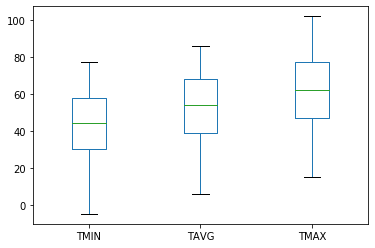

In [52]:
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box');

In [53]:
weather['TDIFF'] = weather.TMAX - weather.TMIN
weather.TDIFF.describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

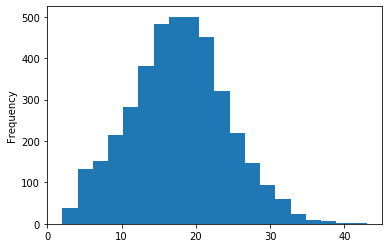

In [55]:
weather.TDIFF.plot(kind='hist', bins=20);

In [72]:
WT = weather.loc[:, 'WT01':'WT22']
weather['bad_conditions'] = WT.sum(axis=1).astype(int)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 29 columns):
STATION           4017 non-null object
DATE              4017 non-null object
TAVG              1217 non-null float64
TMIN              4017 non-null int64
TMAX              4017 non-null int64
AWND              4017 non-null float64
WSF2              4017 non-null float64
WT01              1767 non-null float64
WT02              221 non-null float64
WT03              224 non-null float64
WT04              117 non-null float64
WT05              360 non-null float64
WT06              25 non-null float64
WT07              79 non-null float64
WT08              404 non-null float64
WT09              69 non-null float64
WT10              2 non-null float64
WT11              1 non-null float64
WT13              1175 non-null float64
WT14              575 non-null float64
WT15              6 non-null float64
WT16              1326 non-null float64
WT17              12 non-null float64
WT

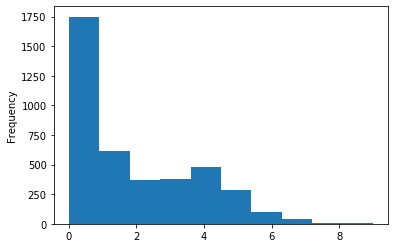

In [73]:
weather.bad_conditions.plot(kind='hist');

In [74]:
weather['rating'] = weather.bad_conditions.map({0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 
                                                5:'worse', 6:'worse', 7:'worse', 8:'worse', 
                                                9:'worse'})
weather.rating.value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

In [85]:
weather['rating'] = pd.Categorical(weather.rating, categories=['good', 'bad', 'worse'], ordered=True)
weather.rating.dtype

CategoricalDtype(categories=['good', 'bad', 'worse'], ordered=True)

In [86]:
ri.reset_index(inplace=True)
ri

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86531,2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,False,8
86532,2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
86533,2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8
86534,2015-12-31 22:09:00,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3,False,8


In [88]:
weather_rating = weather[['DATE', 'rating']]
weather_rating

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad
...,...,...
4012,2015-12-27,bad
4013,2015-12-28,good
4014,2015-12-29,bad
4015,2015-12-30,bad


In [90]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
ri_weather.set_index('stop_datetime', inplace=True)
ri_weather

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,2005-01-04,bad
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8,2005-01-23,worse
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,2005-02-17,good
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23,2005-02-20,bad
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8,2005-02-24,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,False,8,2015-12-31,bad
2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8,2015-12-31,bad
2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8,2015-12-31,bad


In [91]:
ri_weather.is_arrested.mean()

0.0355690117407784

In [93]:
ri_weather.groupby('rating').is_arrested.mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

In [95]:
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()
arrest_rate

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

In [96]:
arrest_rate.loc['Moving violation', 'bad']

0.05804964058049641

In [97]:
arrest_rate.loc['Speeding']

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64

In [98]:
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


In [99]:
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886
